### Deskriptive und Explorative Datenanalyse der KiDAQ-Daten
Um die Daten deskriptiv und explorativ auszuwerten, müssen die Daten visualisert werden. Um diesen Prozess zu automatisieren und dadurch zu vereinfachen können innerhalb dieses interaktiven Abschnitts verschiedene Einstellungen vorgenommen werden, um sich Plots zu generieren.
Diese Plots werden innerhalb des Notebooks angezeigt und können Einzeln oder als Serie abgespeichert werden.
___   

### Python Imports
Für die ordnungsgemäße Nutzung müssen einige Bibliotheken (Libraries) vorab importiert werden. Ein Import wird über das Schlüsselwort <b>import</b> durchgeführt, zusätzlich kann noch über das <b>as</b> der Name des importieren Pakets geändert werden.

In [1]:
import pathlib as pl
import pandas as pd
from asammdf import MDF
import ipywidgets as widgets

ldf is not supported
xls is not supported
xlsx is not supported
yaml is not supported


Um den kidaq-folder Pfad ordnungsgemäß zu setzen kann dieser einfach aus dem Explorer kopiert und wie folgt eingefügt werden: r'<FOLDER_PATH>'

In [3]:
# E:\Messdaten\Setup-I\2021-04-28 - Gut 1 as pathlib path
kidaq_folder = r'E:\Messdaten\Setup-I\2021-04-28 - Gut 1\KiDAQ'

Nun kann der Ordner ausgewählt werden aus dessen Dateien später die Plots generiert werden.

In [4]:
# create a path object
path = pl.Path(kidaq_folder)
# list all folders in the path
folders = [str(x) for x in path.iterdir() if x.is_dir()]
# create a widget to select the folders
select = widgets.Select(
    options=folders,
    value=folders[0],
    description='Folders:',
    disabled=False,
    layout=widgets.Layout(width='90%')
)
display(select)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Messdaten\\Setup-I\\2021-04-28 - Gut 1\\KiDAQ'

Über die Window-Size kann die Größer der Fenster eingestellt werden. Standardmäßig werden 100.000 Punkte zu einem Fenster zusammengefügt.

In [ ]:
# set window size
window_size_int = widgets.BoundedIntText(
    value=100000,
    min=0,
    max=1000000,
    step=1,
    description='Window Size:',
    disabled=False
)
display(window_size_int)

BoundedIntText(value=100000, description='Window Size:', max=1000000)

Über die Step-Size kann die Verschiebung der einzelnen Fenster eingestellt werden. Stellen wir diesen ebenfalls auf 100.000 kommt es zu keiner Überlappung, da jedes Fenster immer um 100.000 Punkte weitergeschoben wird. Stellen wir allerdings die Step-Size kleiner als die Window-Size, so kommt es zu einer Überlappung der Fenster, da die selben Punkte nun in mehreren Fenstern liegen können.

In [5]:
# set window size
step_size_int = widgets.BoundedIntText(
    value=100000,
    min=0,
    max=1000000,
    step=1,
    description='Step Size:',
    disabled=False
)
display(step_size_int)

BoundedIntText(value=100000, description='Step Size:', max=1000000)

Die letzte Einstellung beinhaltet die Aggregation der Werte. Es kann hierbei zwischen 'median', 'std', 'min' und 'max' gewählt werden. Die Aggregation bezieht sich hierbei immer auf die einzelnen Fenster. Alle Punkte innerhalb des Fenstern werden mittels der Aggregation zusammen gerechnet und es entsteht ein neuer einzelner Punkte pro Fenster. Aus diesem Grund ist es manchmal Ratsam eine Fensterüberlappung zu zulassen.

In [6]:
agg_type_dropdown = widgets.Dropdown(
    options=['median', 'std', 'min', 'max'],
    value='median',
    description='Aggregation:',
    disabled=False,
)
display(agg_type_dropdown)

Dropdown(description='Aggregation:', options=('median', 'std', 'min', 'max'), value='median')

Der letzten und längste Schritt ist nun die Generierung der einzelnen Plots untereinander.

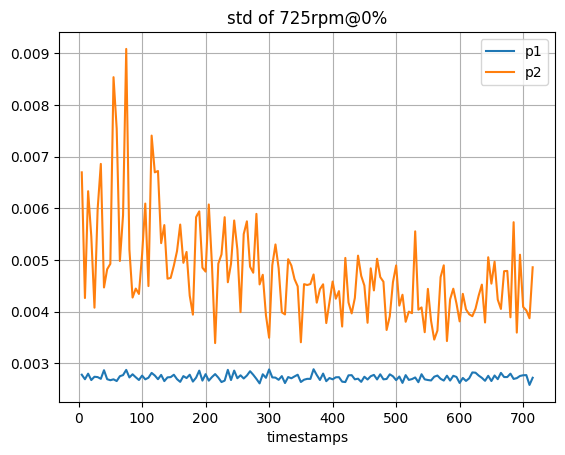

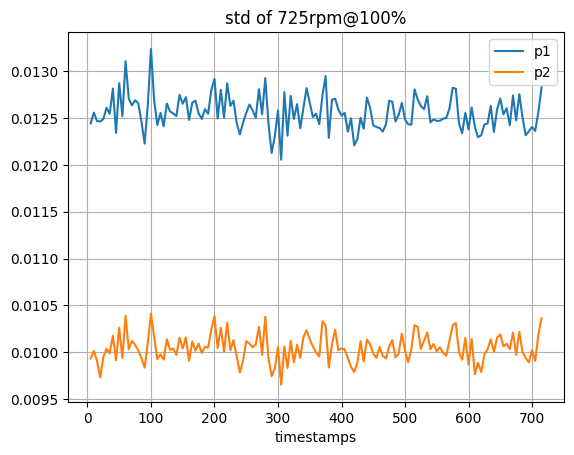

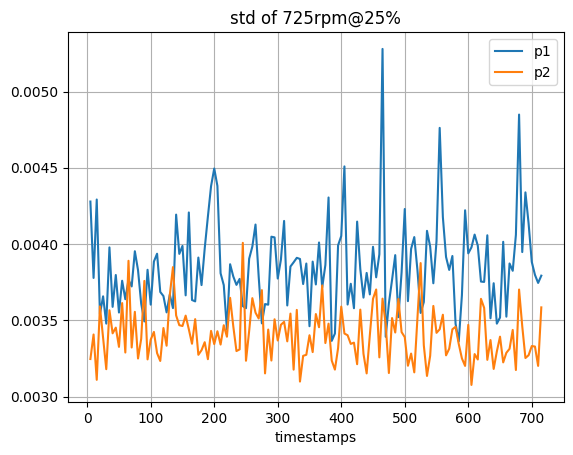

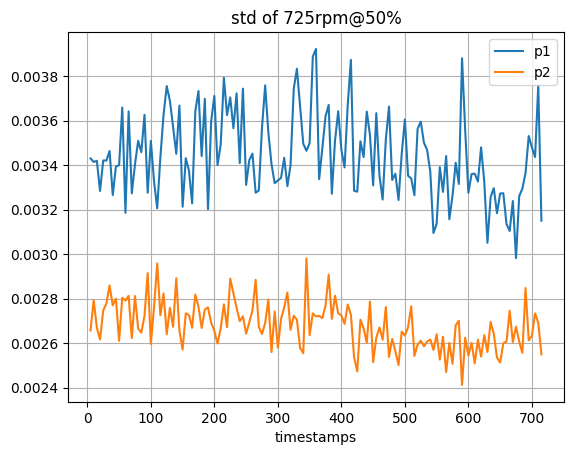

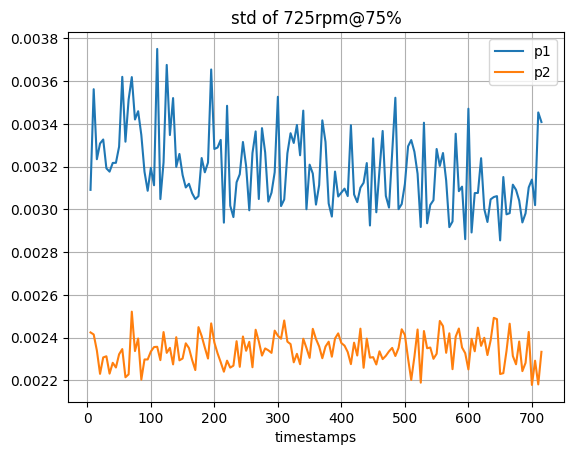

In [9]:
# read mdf file in loop and aggregate data
# create a path object
path = pl.Path(select.value)
# list all mdf files in the path
mdf_files = [x for x in path.iterdir() if x.is_file() and x.suffix == '.mf4']
# loop over all mdf files
for mdf_file in mdf_files:
    # create a mdf object
    mdf_obj = MDF(mdf_file)
    # transform to dataframe
    df = mdf_obj.to_dataframe()
    # aggregate data
    df_agg = df[['p1', 'p2']].rolling(window=window_size_int.value, step=step_size_int.value).agg(agg_type_dropdown.value)
    # give title to plot example: median of 2021-04-28 - Gut 1_725rpm@0% 
    title = f'{agg_type_dropdown.value} of {mdf_file.stem}'
    # plot data
    df_agg.plot(title=title, grid=True)